In [121]:
import numpy as np
import cv2
import random
import os
import matplotlib.pyplot as plt

In [122]:
#function to resize (the longest side of) an image given: an image, the desired size
def resizeImage(img: np.ndarray, size: int) -> np.ndarray:
    max_dim_idx = np.argmax(img.shape[0:2]) #shape index corresponding to longest side
    other_idx = 0 if max_dim_idx == 1 else 1 #shape index corresponding to min dimension (excluding channels) 
    new_shape = [0]*2 #initialzing list of zeros to store new shape
    new_shape[max_dim_idx] = size #setting longest side of image to desired size
    new_shape[other_idx] = int(img.shape[other_idx] * (size / img.shape[max_dim_idx])) #setting smallest side of image to maintain asepct ratio
    new_shape = tuple(reversed(new_shape)) #reversing tuple bc cv2 shape dims are weird
    return cv2.resize(img, new_shape) #returning resized img

#function to make an image square using padding
def makeImageSquare(img: np.ndarray, size: int, padding_type=cv2.BORDER_REFLECT) -> np.ndarray:
    if img.shape[0] == img.shape[1]: #check if img is already square
        return img
    
    square = np.zeros(shape=(size,size,img.shape[2])) #initalizing image-shaped square of zeross

    max_dim_idx = np.argmax(img.shape) #assumes img.shape[max_dim_idx] == size
    # other_idx = 0 if max_dim_idx == 1 else 1

    height, width = img.shape[0], img.shape[1] #height, width of image

    if max_dim_idx == 0: #height == size -> resize width
        padding = (size - width) // 2 #size of padding to use on width
        #adding padding to width
        square = cv2.copyMakeBorder(src=img, top=0, bottom=0, left=padding, right=padding, borderType=padding_type)        

    elif max_dim_idx == 1: #width == size -> resize height
        padding = (size - height) // 2 #size of padding to use on height
        #adding padding to height
        square = cv2.copyMakeBorder(src=img, top=padding, bottom=padding, left=0, right=0, borderType=padding_type)        

    return square

Load image

In [123]:
image_dir = "C:\\Users\\tcuri\\Documents\\_UC Merced Documents\\research\\insite\\image_data\\Water Bodies Dataset\\Images"
num_images = len(os.listdir(image_dir))
img_idx = random.sample(list(range(num_images)), k=1)[0]
test_img_name = sorted(os.listdir(image_dir))[img_idx]
test_img = cv2.imread(filename=os.path.join(image_dir, test_img_name))

(158, 152, 3)


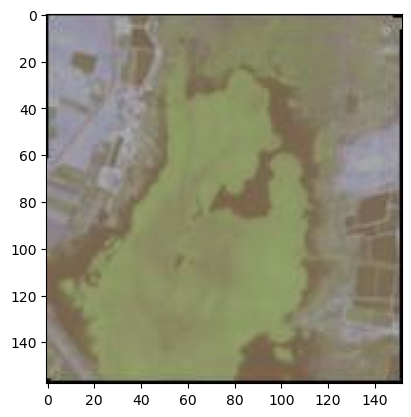

In [124]:
print(test_img.shape)
plt.imshow(test_img)
plt.show()

Resize the longest side

(256, 246, 3)


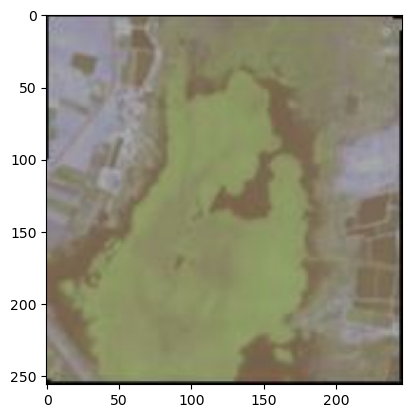

In [125]:
size = 256
resized_img = resizeImage(img=test_img, size=size)

print(resized_img.shape)
plt.imshow(resized_img)
plt.show()

Make image square

(256, 256, 3)


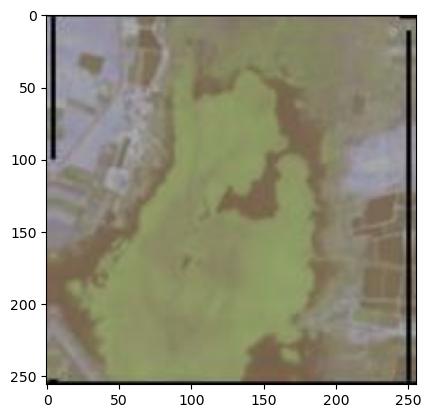

In [126]:
square_img = makeImageSquare(img=resized_img, size=size)

print(square_img.shape)
plt.imshow(square_img)
plt.show()